Introduction to Moveless

This Notebook is a great getting started resource into using our QCCD compiler, Moveless.

We first compile and gather execution times for each circuit to run using the respective compiler. We then convert into a portable format of timings and schedules, create stim circuit files off those schedules, and evaluate the logical error rate. We must use independent decoding frameworks for surface and color codes.

First, load all of the codes to run.

In [1]:
import subprocess as sp
import os
import csv
import math



PROG = []

In [2]:
###COLOR CODES

def add_color_codes(PROG):
    arr = os.listdir("Circuits/CodeFamilies/ColorCodes/")
    for x in arr:
        circ = x
        n = int(circ.split("-")[0])
        max_ancillas = n - 1
        real_ancilla_of_circuit = int(circ.split("_code")[1].split("Ancilla")[0])

        #Enforce Interval Cutoffs for different Ancilla Values (optional)
        if (real_ancilla_of_circuit == 1 or real_ancilla_of_circuit == round(0.2 * max_ancillas) or real_ancilla_of_circuit == round(0.4 * max_ancillas) or real_ancilla_of_circuit == round(0.6 * max_ancillas) or real_ancilla_of_circuit == round(0.8 * max_ancillas) or real_ancilla_of_circuit == max_ancillas):
            PROG.append("Circuits/CodeFamilies/ColorCodes/" + x)

#add_color_codes(PROG)

In [3]:
###SURFACE CODES

def add_surface_codes(PROG):
    arr = os.listdir("Circuits/CodeFamilies/SurfaceCodes/")
    for x in arr:
        circ = x
        n = int(circ.split("-")[0])
        max_ancillas = n - 1
        real_ancilla_of_circuit = int(circ.split("_code")[1].split("Ancilla")[0])

        #Enforce Interval Cutoffs for different Ancilla Values (optional)
        if (real_ancilla_of_circuit == 1 or real_ancilla_of_circuit == round(0.2 * max_ancillas) or real_ancilla_of_circuit == round(0.4 * max_ancillas) or real_ancilla_of_circuit == round(0.6 * max_ancillas) or real_ancilla_of_circuit == round(0.8 * max_ancillas) or real_ancilla_of_circuit == max_ancillas):
            if (n != 121):
                PROG.append("Circuits/CodeFamilies/SurfaceCodes/" + x)
add_surface_codes(PROG)

In [4]:
###ARBITRARY STABILIZER CODES

def add_stabilizer_codes(PROG):
    arr = os.listdir("Circuits/Arbitrary_Stabilizer/")
    for x in arr:
        lines = [
        "5-1-3",
        "8-2-3",
        "10-1-4",
        "11-1-5",
        "12-2-4",
        "13-1-5",
        "14-2-5",
        "15-1-5",
        "16-2-6",
        "17-1-7",
        "19-1-7",
        "20-2-6",
        "21-1-7",
        "23-2-7",
        "25-1-9"]
        #arr = x.split("Circuits/Circuits/")
        circ = x
        n = int(circ.split("-")[0])
        k = int(circ.split("-")[1])
        d = int(circ.split("-")[2].split("_code")[0])
        max_ancillas = n - k
        real_ancilla_of_circuit = int(circ.split("_code")[1] .split("Ancilla")[0])
        if (real_ancilla_of_circuit == 1 or real_ancilla_of_circuit == round(0.2 * max_ancillas) or real_ancilla_of_circuit == round(0.4 * max_ancillas) or real_ancilla_of_circuit == round(0.6 * max_ancillas) or real_ancilla_of_circuit == round(0.8 * max_ancillas) or real_ancilla_of_circuit == max_ancillas):
            if (f"{n}-{k}-{d}" in lines):
                PROG.append("Circuits/Arbitrary_Stabilizer/" + x)

#add_stabilizer_codes(PROG)


In [ ]:
###MACHINE/EXPERIMENTAL CONSTANTS SETUP
def run_compilers():
    filename = "Moveless_Example"


    log_file_string = f"{filename}.log" 
    csv_string = f"{filename}.csv" 
    output_file = open(log_file_string,'w')


    COMPILERS = ["Moveless", "Baseline", "MAO"] #Options are Moveless, Baseline, and MAO. 
    LER_MODE = True #switch on if the experiment will continue to generate exact timings files, stim files, and ultimately logical error rates. Turn off if you just want execution times in a csv.

    reorder = "Naive"

    row = ["Program Name","Ions Per Trap","Machine","Compiler Choice","Number of Ancilla", "Fidelity"]
    with open(csv_string, 'w', newline='') as outfile:
        writer = csv.writer(outfile)
        writer.writerow(row)


    #Can optionally declare a preset machine (or list of machines here) instead of a machine with variable traps according to code

    #MACHINE = ["L15", "C20"] #machine string choices defined in run.py and mapped to machine objects in test_machines.py
    for p in PROG:
        split_arr = p.split("-")
        remain = split_arr[0]
        k = int(split_arr[1])
        #num = remain.split("Cycles/")[1]
        num = remain.split("Codes/")[1]
        #num = remain.split("Circuits/")[1]
        #num = remain.split("DRCycles/")[1]
        n = int(num)
        C = n - k
        IONS = ["5"]
        
        CONSTANT = 1
        number_traps = math.ceil(C/CONSTANT)
        mach_string = "L" + str(number_traps)
        #print("NUMBER OF TRAPS", number_traps)
        print("RUNNING", p)

        MACHINE = [mach_string]
        LER_MODE = "True" #must be string form of boolean, capitalize first letter (sp can only interpret strings)
        for i in IONS:
            optimal = C
            for m in MACHINE:
                    for compiler in COMPILERS:
                        code = sp.call(["python", "run.py", p, m, i, compiler, 
                                    reorder, "1", "0", "0", "FM", "GateSwap", 
                                    csv_string, "80", LER_MODE], stdout=output_file) 
                        if (code != 0): #exit code success
                            print("There was an error running", p, "Debug outside a notebook (can use run_batch.py).")




    print("Done Generating Execution Time Logs and CSV!")

###COMMENT THIS LINE OUT IF RERUNNING. DATA FILES ARE OVERWRITTEN UPON EACH RUN.
#~1 HR to run all benchmarks
run_compilers()


RUNNING Circuits/CodeFamilies/SurfaceCodes/25-1-5_code10Ancilla.qasm
RUNNING Circuits/CodeFamilies/SurfaceCodes/25-1-5_code14Ancilla.qasm
RUNNING Circuits/CodeFamilies/SurfaceCodes/25-1-5_code19Ancilla.qasm
RUNNING Circuits/CodeFamilies/SurfaceCodes/25-1-5_code1Ancilla.qasm
RUNNING Circuits/CodeFamilies/SurfaceCodes/25-1-5_code24Ancilla.qasm
RUNNING Circuits/CodeFamilies/SurfaceCodes/25-1-5_code5Ancilla.qasm
RUNNING Circuits/CodeFamilies/SurfaceCodes/49-1-7_code10Ancilla.qasm
RUNNING Circuits/CodeFamilies/SurfaceCodes/49-1-7_code19Ancilla.qasm
RUNNING Circuits/CodeFamilies/SurfaceCodes/49-1-7_code1Ancilla.qasm
RUNNING Circuits/CodeFamilies/SurfaceCodes/49-1-7_code29Ancilla.qasm
RUNNING Circuits/CodeFamilies/SurfaceCodes/49-1-7_code38Ancilla.qasm
RUNNING Circuits/CodeFamilies/SurfaceCodes/49-1-7_code48Ancilla.qasm
RUNNING Circuits/CodeFamilies/SurfaceCodes/81-1-9_code16Ancilla.qasm
RUNNING Circuits/CodeFamilies/SurfaceCodes/81-1-9_code1Ancilla.qasm
RUNNING Circuits/CodeFamilies/SurfaceC

Step 2: 

Once compilers are done executing schedules and outputting gate time, it is time to benchmark these new circuits (with all atomic operations accounted for) under realistic hardware aware noise models. First, we take the pickled schedules and we parse them into arrays representing time slices. We save the gates and times for each step. We then create stim circuits (writing directly to the file) which execute  the circuit and its inverse circuit paired together. 

In [6]:
import pickle as pkl
import copy
import os
#This file was made originally in April '24 when baseline = greedy, and was coincidentally named baselineTimingsParser. The word baseline, greedy, and cyclone can all be used interchangeably.

def parseTimings(folder_name):
    astrings = ["0.2m", "0.4m", "0.6m", "0.8m", "1m", "maxm"]
    for ancilla_string in astrings:
        arr = os.listdir(folder_name + ancilla_string + "/") 
        print("arr", arr)
        for a in arr:
            name = folder_name + ancilla_string + "/" + a
            with open(name, 'rb') as file:
                dictionary = pkl.load(file)
                cx_arr = [[]]
                timings = []
                curr_list = []
                layer = 0 #assumes the first thing we do is a gate
                oldlayer = 0
                operations = []
                timings_set = []
                print("new a is", a)
                if (a.split("_")[1] == "CxsBaseline.pkl" or a.split("_")[1] == "TimingsBaseline.pkl"): #pass on timings baseline files already made if using this script to make additional baseline timings files (RERUNNING THIS SCRIPT WITHOUT DELETING THEM)
                    print("SKIPPED (this file is already present in the folder)", a)
                    continue
                for x in dictionary:
                    if (len(x[4]['ions']) == 2):
                        operations.append(x)
                        if (x[1] == 1):#is a gate
                            #assert(x[2] + 100 == x[3]) ONLY HAVE THIS ASSERTION GO OFF IF ION CHAIN LENGTH IS LOW ENOUGH
                            if (x[3] not in timings_set):
                                timings_set.append(x[3])
                            layer = x[2]
                            if (layer != oldlayer):
                                cx_arr.append([(x[4]['ions'][0], x[4]['ions'][1])])
                                oldlayer = layer
                            else:
                                cx_arr[-1].append((x[4]['ions'][0], x[4]['ions'][1]))
                                oldlayer = layer
                base = 0
                print("timings set", timings_set)
                
                for x in timings_set:
                    new_time = x - base
                    timings.append(new_time)
                    base = x
                    dump_name_cx = folder_name + ancilla_string + "/" + a.split("_")[0] + "_CxsBaseline.pkl"
                    dump_name_timings = folder_name + ancilla_string + "/" + a.split("_")[0] + "_TimingsBaseline.pkl"
                print(cx_arr)
                print("timings", timings)
                print(len(cx_arr))
                print(len(timings))
                print("Sum for ", ancilla_string, ":")
                print(sum(timings))
                with open(dump_name_cx, "wb") as f1:
                    pkl.dump(cx_arr, f1)
                with open(dump_name_timings, "wb") as f2:
                    pkl.dump(timings, f2)

folder_names = ["Demo_Baseline_Timings/", "Demo_Moveless_Timings/"]
for name in folder_names:
    parseTimings(name)
print("Successfully generated time slice objects!")
                    

arr ['25-1-5_code5Ancilla.pkl', '49-1-7_code10Ancilla.pkl', '81-1-9_code16Ancilla.pkl', '9-1-3_code2Ancilla.pkl']
new a is 25-1-5_code5Ancilla.pkl
timings set [570, 670, 850, 940, 1040, 1610, 2730, 2820, 2830, 3670, 4230, 6210, 7250, 7520, 7890, 8460, 9030, 10150, 10250, 10530, 10610, 10630, 10710, 11720, 13040, 13600, 13870, 13970, 14250, 14820, 15300, 16020, 16330, 16430, 16500, 16980, 17540, 18110, 19220, 20640, 21120, 21200, 21210, 21220, 22240, 23650, 24220, 25260, 26670, 26840, 28720, 29650, 30040, 30520, 30590, 31080, 32020, 32560, 32570, 32960, 33040, 33680, 34620, 35660, 36220, 36700, 37740, 38310, 39250, 39630, 39720, 39730, 41230, 43020, 43110, 44060, 44150, 45270, 45660]
[[], [(25, 0)], [(25, 1)], [(27, 1)], [(25, 5)], [(26, 2), (25, 6)], [(26, 3)], [(28, 3)], [(26, 7)], [(28, 4)], [(26, 8)], [(27, 2)], [(29, 6)], [(25, 8)], [(26, 10)], [(29, 7)], [(25, 9)], [(29, 11)], [(25, 13)], [(25, 14)], [(29, 12)], [(26, 11)], [(27, 12)], [(26, 15)], [(25, 20)], [(26, 16)], [(27, 13)

In [ ]:
import circuit_generator
import createStimCircs

#Can decide pphys values to generate the circuit. Default = [1e-4, 2e-4, 3e-4, 4e-4, 5e-4, 6e-4, 7e-4, 8e-4, 9e-4, 1e-3]
#Full method with more customizable parameters in createStimCircs
#Runtime < 1 minute
createStimCircs.run_create_stim_circs(pphys_range=[1e-4, 2e-4, 3e-4, 4e-4, 5e-4, 6e-4, 7e-4, 8e-4, 9e-4, 1e-3])
           

Successfully wrote stim file!
Successfully wrote stim file!
Successfully wrote stim file!
Successfully wrote stim file!
Successfully wrote stim file!
Successfully wrote stim file!
Successfully wrote stim file!
Successfully wrote stim file!
Successfully wrote stim file!
Successfully wrote stim file!
Successfully wrote stim file!
Successfully wrote stim file!
color dict {0: [[0, 1, 2, 3], [0, 1, 2, 3], [4, 5, 16, 17], [4, 5, 16, 17], [6, 7, 8, 9, 10, 11], [6, 7, 8, 9, 10, 11]], 1: [[2, 3, 4, 5, 6, 7], [2, 3, 4, 5, 6, 7], [15, 16, 17, 18], [15, 16, 17, 18], [10, 11, 13, 14], [10, 11, 13, 14]], 2: [[1, 2, 7, 8], [1, 2, 7, 8], [5, 6, 11, 14, 15, 16], [5, 6, 11, 14, 15, 16], [9, 10, 12, 13], [9, 10, 12, 13]]}
color dict {0: [[0, 1, 2, 3], [0, 1, 2, 3], [4, 5, 16, 17], [4, 5, 16, 17], [6, 7, 8, 9, 10, 11], [6, 7, 8, 9, 10, 11]], 1: [[2, 3, 4, 5, 6, 7], [2, 3, 4, 5, 6, 7], [15, 16, 17, 18], [15, 16, 17, 18], [10, 11, 13, 14], [10, 11, 13, 14]], 2: [[1, 2, 7, 8], [1, 2, 7, 8], [5, 6, 11, 14, 15

Now time to test the logical error rate of the circuits, and make corresponding plots. 

First, start with surface codes

In [ ]:
import stim
import sinter
from typing import List

def compute_ler_SC(file_name, compiler_mode, inputCircuit=None, ancilla_str="1m"):
    if (compiler_mode == "Moveless"):
        circuit = stim.Circuit.from_file("stim_files_Moveless/surface_codes/" + ancilla_str + "/" + file_name)
    elif (compiler_mode == "Baseline"):
        circuit = stim.Circuit.from_file("stim_files_Baseline/surface_codes/" + ancilla_str + "/" + file_name)
    elif (compiler_mode == "Test"):
        circuit = inputCircuit
    else:
        print("invalid compiler mode")
        assert(0)
    #print("FILE NAME", file_name)
    #print("Circuit", circuit)
    tasks = [
    sinter.Task(circuit=circuit)]
    #print("got to this point here after reading circuit")
    num_shots = 10_000_000
    collected_stats: List[sinter.TaskStats] = sinter.collect(
        num_workers=6,
        tasks=tasks,
        decoders=['pymatching'],
        max_shots=num_shots,
        max_errors=num_shots/100,
    )
    errors = collected_stats[0].errors
    #num_logical_errors = count_logical_errors(circuit, num_shots)
    #print("there were", num_logical_errors, "wrong predictions (logical errors) out of", num_shots, "shots")
    return errors/num_shots



def make_ler_plot_SC(compiler_mode, name, p_range=[0,1], ancilla_str="1m"):
    
    
    if (compiler_mode == "Moveless"):
        arr = os.listdir("stim_files_Moveless/surface_codes/" + ancilla_str + "/")
    elif (compiler_mode == "Baseline"):
        arr = os.listdir("stim_files_Baseline/surface_codes/"+ ancilla_str + "/")
    else:
        print("Unknown circuit generation mode")
        assert(0)
    #print("arr", arr)
    errors= []
    x_axis = []
    arr = sorted(arr)
    for x in arr:
        if (x.split("p")[0] == name): #I think it wont include full path so this should be good
            right = x.split("p=")[1]
            remainder = right.split("d=")[0]
            p = float(remainder)
            if (p_range[0] <= p and p <= p_range[1]):
                x_axis.append(p)
                print("Circuit is", x)
                ler = compute_ler_SC(x, compiler_mode=compiler_mode, ancilla_str=ancilla_str)
                print("Finished a computation for", p)
                print("Got ler", ler)
                errors.append(ler)
    print("x axis", x_axis)        
    return errors, x_axis



#Find Moveless LERS

#p range can be any subset of what circuits were generated in the creating stim circuit step.
#NOTE: Ensure sufficient shots are taken > 10*LER. 
#Naming convention is "n-k-d" for a given code SC/CC 
moveless_SC, x = make_ler_plot_SC("Moveless", "49-1-7", [1e-4, 1e-3], "1m")  #1M is chosen for best Moveless performance on linear architectures.
baseline_SC, x_baseline = make_ler_plot_SC("Baseline", "49-1-7", [1e-4, 1e-3], "maxm") #Baseline full ancillary count







Circuit is 49-1-7p=0.0001d=7.stim
Finished a computation for 0.0001
Got ler 1e-06
Circuit is 49-1-7p=0.0002d=7.stim
Finished a computation for 0.0002
Got ler 1.44e-05
Circuit is 49-1-7p=0.0003d=7.stim
Finished a computation for 0.0003
Got ler 6.26e-05
Circuit is 49-1-7p=0.0004d=7.stim
Finished a computation for 0.0004
Got ler 0.0001884
Circuit is 49-1-7p=0.0005d=7.stim
Finished a computation for 0.0005
Got ler 0.000432
Circuit is 49-1-7p=0.0006d=7.stim
Finished a computation for 0.0006
Got ler 0.0008384
Circuit is 49-1-7p=0.0007d=7.stim
Finished a computation for 0.0007
Got ler 0.0014757
Circuit is 49-1-7p=0.0008d=7.stim
Finished a computation for 0.0008
Got ler 0.0024633
Circuit is 49-1-7p=0.0009d=7.stim
Finished a computation for 0.0009
Got ler 0.003793
Circuit is 49-1-7p=0.001d=7.stim
Finished a computation for 0.001
Got ler 0.005581
x axis [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001]
Circuit is 49-1-7p=0.0001d=7.stim
Finished a computation for 0.0

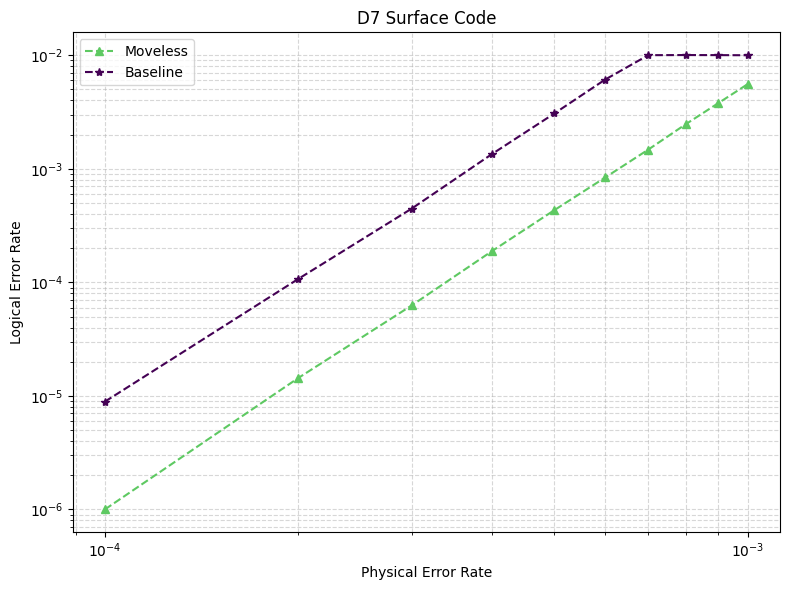

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

def plot_LERS(x, moveless, baseline):
    # Get colors from viridis colormap
    colors = plt.get_cmap('viridis')(np.linspace(0, 1, 5))
    color_baseline = colors[0]
    color_moveless = colors[3]

    plt.figure(figsize=(8, 6))
    plt.plot(x, moveless, label='Moveless', marker='^', linestyle='--', linewidth=1.5, color=color_moveless)
    plt.plot(x, baseline, label='Baseline', marker='*', linestyle='--', linewidth=1.5, color=color_baseline)

    plt.xlabel('Physical Error Rate')
    plt.ylabel('Logical Error Rate')
    plt.grid(True, which='both', ls='--', alpha=0.5)
    plt.xscale('log')
    plt.yscale('log')
    plt.title("D7 Surface Code")
    plt.legend()
    plt.tight_layout()
    plt.show()


#assert(x == x_baseline)
plot_LERS(x, moveless_SC, baseline_SC)

This is the end of the Moveless tutorial. Supplemental notebook for color code decoding is in the color_codes notebook, and requires a custom environment setup. To cite: 